## 훈련, 검증, 테스트 폴더로 이미지 복사하기

In [5]:
import os, shutil

In [6]:
original_dataset_dir = 'C:/Users/Flora/dogs-and-cats/train/train'

In [8]:
'''base_dir = 'C:/Users/Flora/dogs-and-cats/small'
os.mkdir(base_dir) #폴더를 만드는 코드 '''

"base_dir = 'C:/Users/Flora/dogs-and-cats/small'\nos.mkdir(base_dir) #폴더를 만드는 코드 "

### 훈련, 검증, 테스트 분할을 위한 디렉터리

In [11]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

### 훈련용 고양이 사진 디렉터리

In [12]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

### 훈련용 강아지 사진 디렉터리

In [13]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

### 검증용 고양이와 강아지 사진 디렉터리

In [15]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [16]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

### 테스트용 고양이와 강아지 사진 디렉터리

In [17]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [19]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

### 처음 1000개의 고양이 이미지를 train_cats_dir에 복사

In [21]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [23]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [27]:
print(len(os.listdir(train_cats_dir)))

1000


# 네트워크 구성하기

In [28]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## 모델의 훈련 설정하기

In [31]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

C:\Users\Flora\anaconda3\envs\seun\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [32]:
# RMSprop 옵티마이저 선택 
# 네트워크의 마지막이 하나의 시그모이드 유닛 -> 이진 크로스엔트로피를 손실로 사용

# 데이터 전처리

In [33]:
# 데이터는 네트워크에 들어가기 전에 부동소수타입의 텐서로 적절하게 전처리되어야 함
'''1. 사진파일을 읽기
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩함
3. 부동소수 타입의 텐서로 변환
4. 픽셀값(0~255)의 스케일을 [0, 1] 사이로 조정함''' 

'1. 사진파일을 읽기\n2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩함\n3. 부동소수 타입의 텐서로 변환\n4. 픽셀값(0~255)의 스케일을 [0, 1] 사이로 조정함'

## imageDataGenerator을 사용해서 디렉터리에서 이미지 읽기

In [34]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기 : ', data_batch.shape)
    print('배치 레이블 크기 : ', labels_batch.shape)
    break

배치 데이터 크기 :  (20, 150, 150, 3)
배치 레이블 크기 :  (20,)


## 배치 제너레이터를 사용하여 모델 훈련하기

In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

C:\Users\Flora\anaconda3\envs\seun\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
100/100 [==============================] - ETA: 0s - loss: 0.6858 - acc: 0.5560WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001EC281C5A68> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

## 저장하기

In [37]:
model.save('cats_and_dogs_small_1.h5')

## 훈련의 정확도와 손실 그래프 그리기

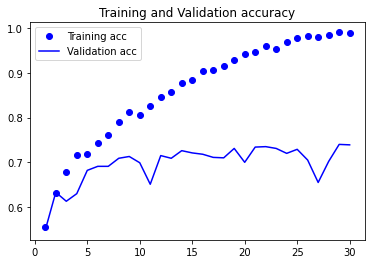

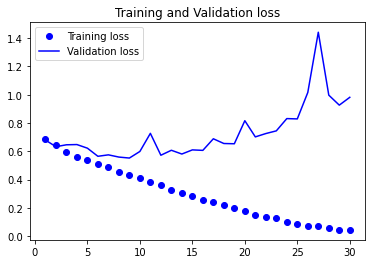

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [39]:
''' 과대적합의 특성을 보여줌
훈련정확도가 시간이 지남에 따라 선형적으로 증가 -> 100%에 도달

검증정확도는 70~72에서 멈춤

검증손실은 최솟값에 다다른 이후 더이상 진전 없음
훈련손실은 0에 도달할때까지 계속 감소

** 과대적합상태 **

드롭아웃이나 가중치감소처럼 과대적합 감소 기법 있음

보통 사용하는 데이터 증식 시도'''

' 과대적합의 특성을 보여줌\n훈련정확도가 시간이 지남에 따라 선형적으로 증가 -> 100%에 도달\n\n검증정확도는 70~72에서 멈춤\n\n검증손실은 최솟값에 다다른 이후 더이상 진전 없음\n훈련손실은 0에 도달할때까지 계속 감소\n\n** 과대적합상태 **\n\n드롭아웃이나 가중치감소처럼 과대적합 감소 기법 있음\n\n보통 사용하는 데이터 증식 시도'

## 데이터 증식 사용하기

In [40]:
# 훈련 할 때 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표

In [41]:
## ImgageDataGenerator 을 사용하여 데이터 증식 설정하기

In [43]:
datagen=ImageDataGenerator(
    rotation_range = 20, #렌덤하게 사진 회전 각도 범위
    width_shift_range = 0.1,
    height_shift_range = 0.1, #사진을 수평과 수직으로 랜덤하게 평행이동시킬 범위
    shear_range = 0.1, #랜덤하게 전단변환을 젂용할 각도범위
    zoom_range = 0.1, #랜덤하게 사진을 확대할 범위
    horizontal_flip = True, #랜덤하게 이미지를 수평으로 뒤집음
    fill_mode = 'nearest') # 회전이나 가로/세로 이동으로 인해 새롭게 생섬해야 할 픽셀을 채움

### 랜덤하게 증식된 훈련이미지 그리기

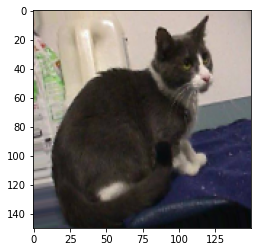

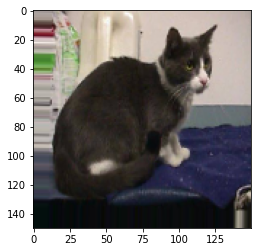

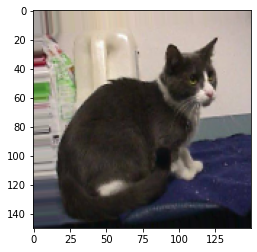

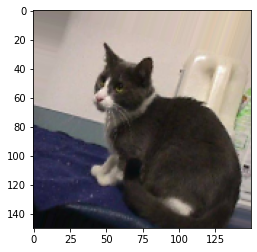

In [60]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])

img_path = fname[3]

img = image.load_img('C:/Users/Flora/dogs-and-cats/small/train/cats/cat.4.jpg', target_size = (150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1 
    if i%4 == 0:
        break
plt.show()

In [61]:
## 새로운 정보를 만들어 낼 수 없고 단시 기존 정보의 재조합만 가능
## 완전히 과대적합제거에 충분치 않음
## 과대헞ㄱ합을 더 억제하기 위해 와넞ㄴ연결 분류기 직전에 dropout 층을 추가

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [63]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\Flora\anaconda3\envs\seun\lib\site-packages\ipykernel_launcher.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


 63/100 [=================>............] - ETA: 5s - loss: 0.6953 - acc: 0.4970WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10000 batches). You may need to use the repeat() function when building your dataset.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
100/100 [=====================

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

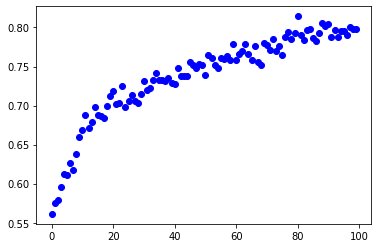

In [57]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()